<a href="https://colab.research.google.com/github/lokeshpondara/YBI-FOUNDATION/blob/main/hand_written_digit_clarification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARY



In [17]:
import pandas as pd


In [16]:
import numpy as np

In [18]:
import matplotlib.pyplot as plt

# IMPORT DATA

In [21]:
from sklearn.datasets import load_digits

In [22]:
df=load_digits()

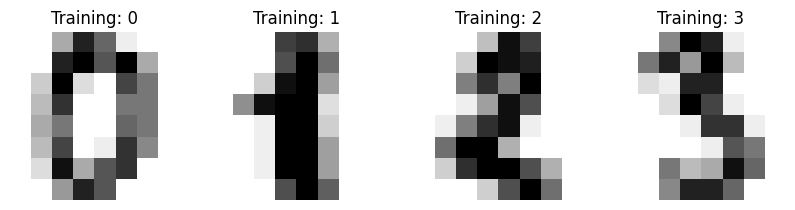

In [25]:
_,axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
  ax.set_axis_off()
  ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
  ax.set_title('Training: %i' % label)

# DATA PREPROCESSING

In [32]:

# Assuming you have an image loaded as a NumPy array called 'image'
flattened_image = image.flatten()

In [34]:
df.images.shape

(1797, 8, 8)

In [37]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [39]:
df.images[0].shape

(8, 8)

In [41]:
len(df.images)

1797

In [43]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [45]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [47]:
data[0].shape

(64,)

In [48]:
data.shape

(1797, 64)

# SCALING DATA IMAGE

In [50]:
data.min()

0.0

In [52]:
data.max()

16.0

In [54]:
data=data/16

In [55]:
data.min()

0.0

In [56]:
data.max()

0.0625

In [58]:
data[0]

array([0.        , 0.        , 0.01953125, 0.05078125, 0.03515625,
       0.00390625, 0.        , 0.        , 0.        , 0.        ,
       0.05078125, 0.05859375, 0.0390625 , 0.05859375, 0.01953125,
       0.        , 0.        , 0.01171875, 0.05859375, 0.0078125 ,
       0.        , 0.04296875, 0.03125   , 0.        , 0.        ,
       0.015625  , 0.046875  , 0.        , 0.        , 0.03125   ,
       0.03125   , 0.        , 0.        , 0.01953125, 0.03125   ,
       0.        , 0.        , 0.03515625, 0.03125   , 0.        ,
       0.        , 0.015625  , 0.04296875, 0.        , 0.00390625,
       0.046875  , 0.02734375, 0.        , 0.        , 0.0078125 ,
       0.0546875 , 0.01953125, 0.0390625 , 0.046875  , 0.        ,
       0.        , 0.        , 0.        , 0.0234375 , 0.05078125,
       0.0390625 , 0.        , 0.        , 0.        ])

# TRAIN TEST SPLIT DATA

In [60]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test=train_test_split(data,df.target,test_size=0.2)

In [63]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

# RANDOM FOREST MODLE

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf=RandomForestClassifier()

In [72]:
rf.fit(x_train, y_train)
RandomForestClassifier()

RandomForestClassifier()

#PREDICT TEST DATA

In [73]:
y_read=rf.predict(x_test)

In [76]:
y_read

array([9, 8, 8, 0, 6, 7, 9, 4, 6, 0, 2, 3, 9, 6, 2, 0, 5, 7, 8, 2, 4, 8,
       4, 2, 1, 7, 6, 9, 4, 1, 4, 8, 4, 6, 3, 5, 1, 2, 3, 7, 1, 5, 5, 6,
       4, 6, 3, 9, 6, 1, 6, 8, 2, 5, 7, 0, 2, 0, 0, 9, 2, 7, 0, 2, 7, 5,
       4, 0, 6, 6, 9, 7, 4, 0, 2, 7, 8, 5, 3, 2, 8, 7, 4, 6, 6, 2, 6, 8,
       5, 3, 6, 3, 4, 7, 2, 7, 6, 8, 0, 4, 5, 7, 4, 6, 1, 1, 7, 3, 6, 5,
       5, 1, 5, 8, 8, 1, 9, 1, 5, 2, 6, 1, 1, 4, 5, 8, 6, 4, 9, 3, 9, 5,
       5, 9, 9, 4, 8, 4, 8, 4, 3, 1, 6, 1, 5, 8, 3, 1, 6, 3, 4, 0, 0, 4,
       3, 5, 4, 6, 6, 8, 7, 3, 3, 4, 8, 4, 3, 6, 0, 6, 5, 9, 2, 3, 7, 9,
       1, 9, 5, 0, 2, 4, 3, 1, 8, 1, 0, 1, 3, 6, 6, 6, 0, 6, 1, 9, 8, 0,
       6, 8, 2, 0, 8, 0, 2, 5, 4, 1, 6, 6, 3, 4, 6, 4, 5, 6, 5, 5, 7, 5,
       9, 5, 8, 2, 1, 6, 9, 8, 2, 9, 8, 5, 9, 4, 1, 0, 1, 0, 1, 4, 9, 1,
       0, 9, 3, 8, 7, 9, 4, 5, 4, 7, 7, 7, 7, 8, 1, 6, 2, 7, 7, 9, 1, 2,
       8, 9, 4, 8, 2, 5, 9, 1, 0, 6, 2, 3, 2, 8, 0, 2, 1, 8, 8, 4, 7, 6,
       5, 1, 8, 0, 0, 7, 0, 8, 3, 0, 8, 6, 2, 7, 8,

# MODEL ACCURACY


In [77]:
from sklearn.metrics import confusion_matrix,classification_report

In [80]:
confusion_matrix(y_test,y_read)

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  1,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 34,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 47,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  1, 38,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 33]])

In [81]:
print(classification_report(y_read,y_read))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        35
           6       1.00      1.00      1.00        47
           7       1.00      1.00      1.00        34
           8       1.00      1.00      1.00        41
           9       1.00      1.00      1.00        34

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360

